# **Group - 15 (Information Diffusion in Social Network)**

In [2]:
# Install pandas for data manipulation
!pip install pandas

# Install NetworkX for network analysis
!pip install networkx

# Install matplotlib for plotting and visualization
!pip install matplotlib

# Install numpy for numerical operations
!pip install numpy

# Install EoN (Epidemics on Networks) for modeling diffusion processes
!pip install EoN

# Install python-igraph for closeness centrality calculation
!pip install python-igraph

# Install community (python-louvain) for Louvain community detection
!pip install python-louvain

# Install seaborn for heatmap visualization
!pip install seaborn

# Install openpyxl to ensure compatibility with reading Excel files
!pip install openpyxl

# Installs the interactive HTML widget framework for Jupyter notebooks and the IPython kernel
!pip install ipywidgets

  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.2-py3-none-any.whl size=122467 sha256=ac6f800fd7b3a24ebbe276759c27f08ed971f88d75077dd63824abcde0e4abf5
  Stored in directory: /Users/ravii../Library/Caches/pip/wheels/53/e8/9d/8cce28ba7bdd58b1859da5582e7ca593ceae00cf9c996a3467
Successfully built EoN
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9388 sha256=c38e181f8c698f6160281fadcba0c3965ecbe45951d2b85d6de30c49bc72cc00
  Stored in directory: /Users/ravii../Library/Caches/pip/wheels/40/f1/e3/485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain


In [4]:
# Import required libraries
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import EoN
from igraph import Graph
from networkx.algorithms.community import girvan_newman
import community as community_louvain
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## > Loading and Preprocessing the Dataset

In [8]:
# Load the dataset from the local file path
email_data = pd.read_excel('/Users/ravii../Downloads/Email-Enron.xlsx')

In [10]:
G = nx.DiGraph()

In [12]:
# Add edges from the dataset
for index, row in email_data.iterrows():
    from_node, to_node = row['FromNodeId'], row['ToNodeId']
    G.add_edge(from_node, to_node)

In [18]:
# Print basic stats
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 36692
Number of edges: 367662


## > Random sample of 500 nodes for visualization

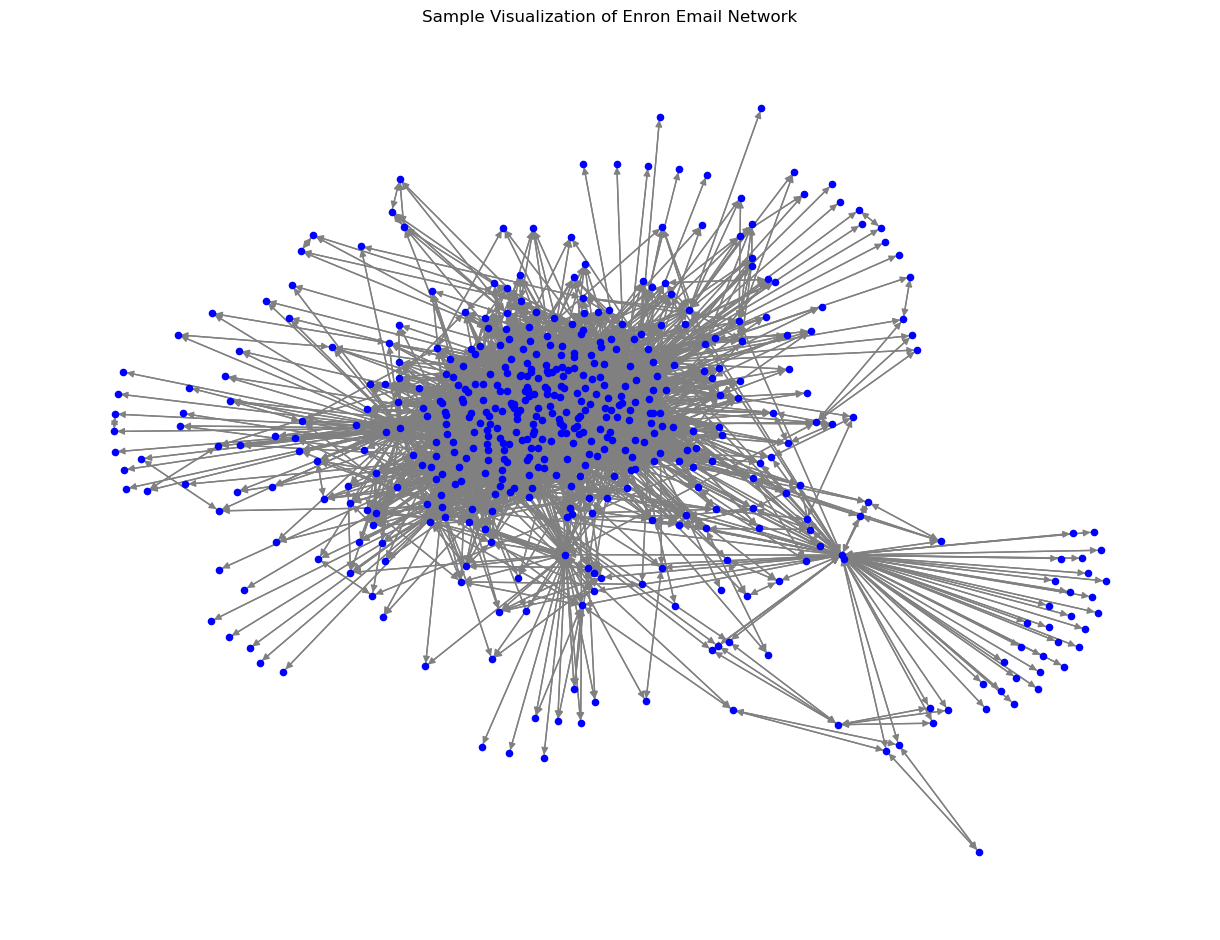

In [40]:
# Draw a random sample of 500 nodes for visualization
sample_nodes = list(G.nodes())[:500]  # Taking the first 500 nodes
sample_graph = G.subgraph(sample_nodes)

# Plot the sample subgraph
plt.figure(figsize=(12, 9))
nx.draw(sample_graph, node_size=20, edge_color="grey", node_color="blue", with_labels=False)
plt.title("Sample Visualization of Enron Email Network")
plt.show()

## > Calculating degree for each node in the sample graph

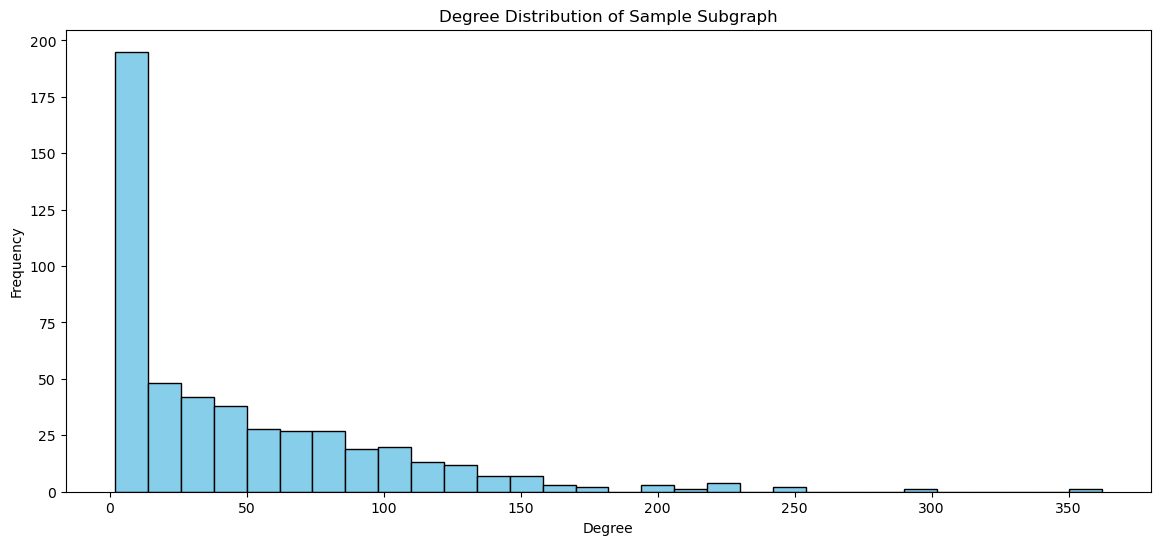

In [48]:
# Calculate degree for each node in the sample graph
degrees = dict(sample_graph.degree())
degree_values = list(degrees.values())

# Plot degree distribution
plt.figure(figsize=(14, 6))
plt.hist(degree_values, bins=30, color='skyblue', edgecolor='black')
plt.title("Degree Distribution of Sample Subgraph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# > Community detection

## - Using Greedy Modularity Algorithm

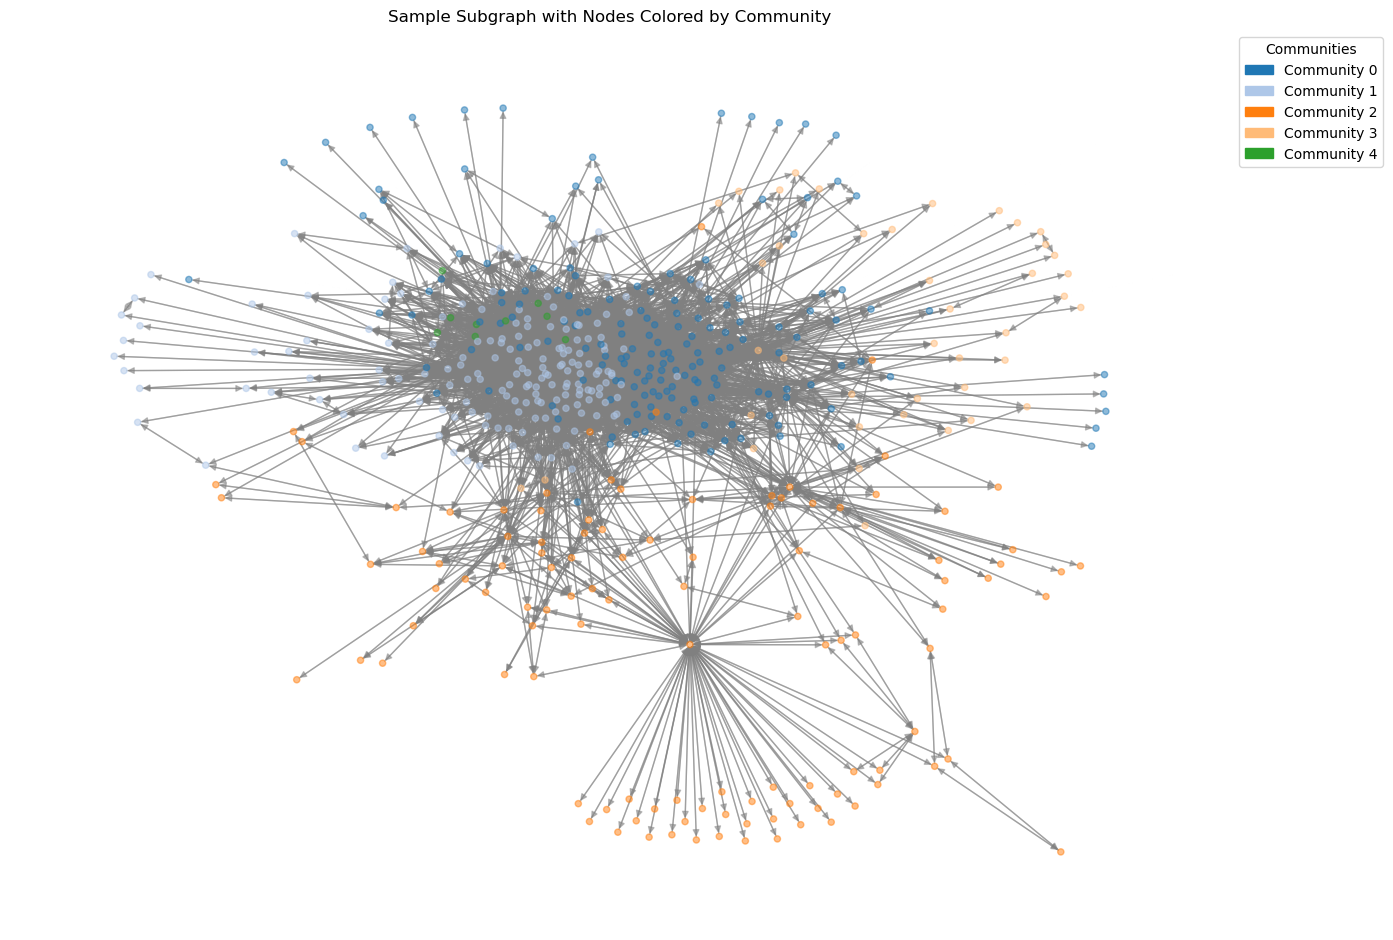

In [68]:
# Import necessary modules
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Community detection on the sample subgraph using the greedy modularity algorithm
communities = list(greedy_modularity_communities(sample_graph.to_undirected()))
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Create a color mapping for each community
num_communities = len(communities)
cmap = plt.colormaps['tab20']
node_colors = [cmap(i % num_communities) for i in [community_map[node] for node in sample_graph.nodes()]]

# Plot the sample graph with community colors
plt.figure(figsize=(12, 9))
nx.draw(
    sample_graph, 
    node_color=node_colors, 
    node_size=20, 
    edge_color='gray', 
    alpha=0.5, 
    with_labels=False
)
plt.title("Sample Subgraph with Nodes Colored by Community")

# Create a legend for communities with colors matching the graph
handles = [
    mpatches.Patch(color=cmap(i % num_communities), label=f'Community {i}') for i in range(num_communities)
]
plt.legend(handles=handles, loc="upper right", title="Communities", bbox_to_anchor=(1.15, 1))

plt.show()

In [142]:
# Sample a subset of nodes to create a smaller graph
sample_size = 1000  # Adjust based on your requirements

# Ensure we have enough nodes to sample from
if len(G.nodes()) < sample_size:
    sample_size = len(G.nodes())

sampled_nodes = random.sample(list(G.nodes()), sample_size)
subgraph = G.subgraph(sampled_nodes)

# Apply Girvan-Newman on the subgraph
communities = girvan_newman(subgraph)
top_level_communities = next(communities)

# Create a mapping for nodes to their community
community_map = {}
for i, community in enumerate(top_level_communities):
    for node in community:
        community_map[node] = i

# Output the detected communities
sorted_communities = [sorted(community) for community in top_level_communities]
for i, community in enumerate(sorted_communities):
    print(f"Community {i}: {community}")

Community 0: [4096]
Community 1: [46, 53, 102, 391, 449, 465, 633, 859, 899, 913, 1144, 1304, 1319, 1510, 1586, 1772, 1783, 2414, 2470, 2753, 4097, 4194, 4389, 4397, 4864, 5045, 5081, 5115, 5157, 5158, 5218, 5471, 5533, 5580, 5598, 5601, 6453, 6960, 8978, 10025, 10027, 10029, 10482, 10802, 10808, 18044, 21411, 21431, 25912, 25939, 25966, 26440]
Community 2: [14339]
Community 3: [4102]
Community 4: [2055, 12174]
Community 5: [16392]
Community 6: [10246]
Community 7: [26638]
Community 8: [4110]
Community 9: [22543]
Community 10: [16401]
Community 11: [26645]
Community 12: [24598]
Community 13: [20503]
Community 14: [34844]
Community 15: [10270]
Community 16: [1101, 1188, 6177, 6486]
Community 17: [32801]
Community 18: [16420]
Community 19: [24613]
Community 20: [22568]
Community 21: [8233]
Community 22: [12332]
Community 23: [49, 118, 326, 434, 510, 520, 552, 675, 1126, 1639, 1813, 1837, 1845, 1860, 2660, 2768, 2983, 3057, 3200, 3209, 3699, 4190, 5308, 5467, 6051, 7156, 7615, 7704, 7942,

## - Using Girvan-Newman Algorithm

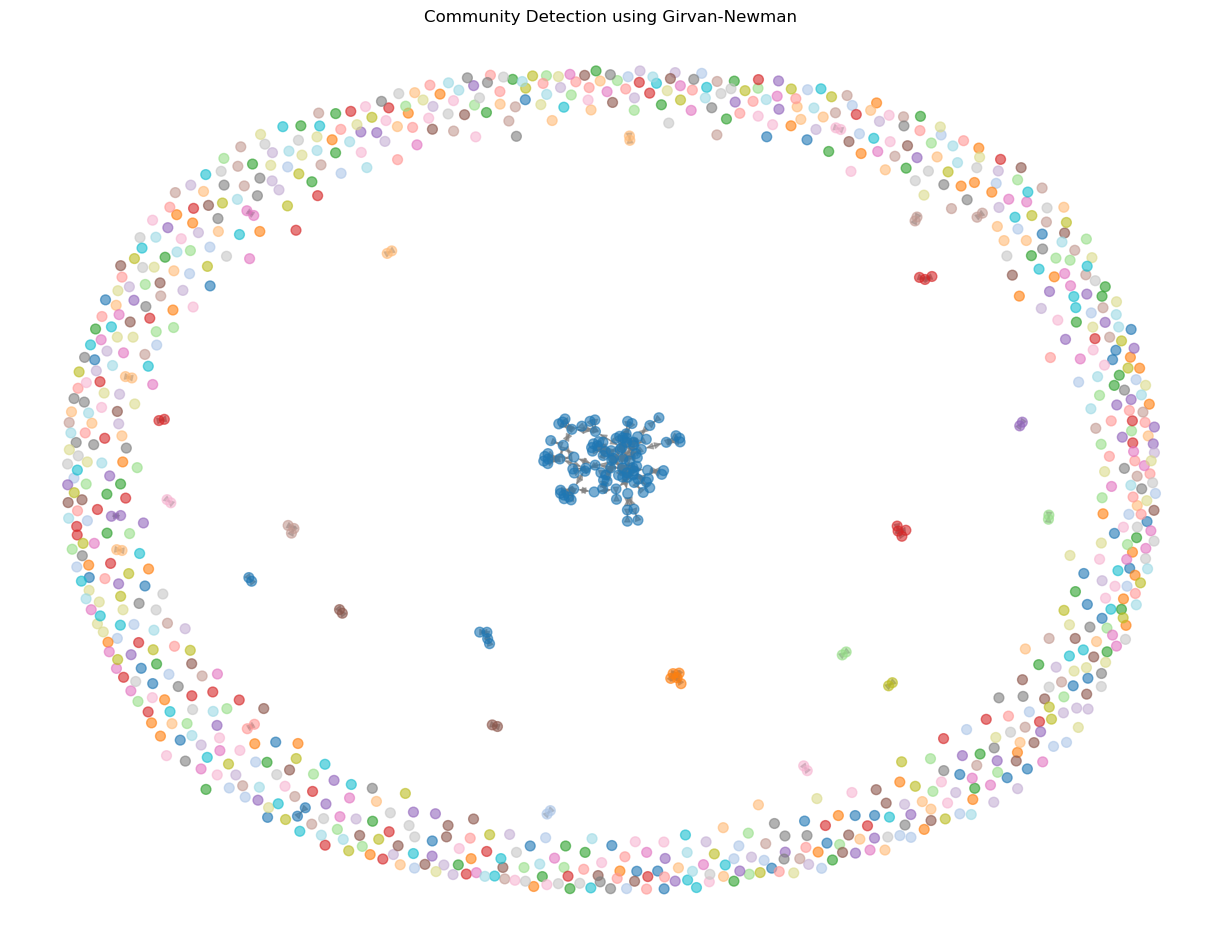

In [144]:
# Assign colors based on community
node_colors = [community_map[node] for node in subgraph.nodes()]

# Plot the subgraph with communities
plt.figure(figsize=(12, 9))
# Use the updated method to get the colormap
cmap = plt.colormaps['tab20']  # Updated colormap access method
nx.draw(subgraph, node_color=node_colors, cmap=cmap, node_size=50, edge_color='gray', alpha=0.6, with_labels=False)

plt.title("Community Detection using Girvan-Newman")
plt.show()

## - Using Louvain Method Algorithm

In [148]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # Louvain method for community detection

# Assuming G is the directed graph created from your Enron email dataset
G_undirected = G.to_undirected()  # Convert to undirected graph

# Apply the Louvain method for community detection
partition = community_louvain.best_partition(G_undirected)

# Print detected communities
print("Detected Communities using Louvain Method:")
for community_id in set(partition.values()):
    community_nodes = [node for node, community in partition.items() if community == community_id]
    print(f"Community {community_id}: {community_nodes}")

# Calculate modularity score for the partition
modularity_score = community_louvain.modularity(partition, G_undirected)
print(f"\nModularity Score of the Louvain Partition: {modularity_score}")

Detected Communities using Louvain Method:
Community 0: [36658, 36659]
Community 1: [3, 4, 6, 7, 46, 49, 50, 70, 8552, 910, 106, 301, 919, 1365, 1793, 5036, 5048, 10606, 88, 81, 1053, 1139, 8556, 362, 112, 409, 873, 939, 1287, 1927, 6828, 342, 8559, 91, 90, 286, 875, 880, 918, 922, 950, 966, 1560, 1817, 5034, 5035, 5039, 5040, 5042, 5044, 5047, 5054, 5055, 5056, 5059, 5060, 5062, 5063, 79, 101, 121, 138, 165, 239, 290, 870, 936, 1668, 1797, 1889, 1891, 1893, 1971, 1993, 2015, 2097, 2098, 2103, 2106, 2109, 97, 122, 141, 168, 185, 240, 271, 287, 363, 377, 385, 789, 881, 938, 1023, 1024, 1180, 1393, 1784, 1888, 1894, 1897, 1910, 1916, 1936, 1945, 1946, 1951, 1954, 1957, 1961, 1972, 1973, 1978, 1982, 1988, 2000, 2004, 2006, 2014, 2024, 2027, 2028, 2031, 2048, 10601, 1094, 6658, 6678, 8379, 8384, 178, 246, 358, 2057, 2061, 2911, 2918, 2921, 261, 282, 320, 720, 914, 1074, 345, 869, 872, 1099, 1105, 1196, 1210, 1228, 1364, 1760, 1833, 1899, 1902, 1937, 2056, 2555, 3187, 4392, 4588, 4815, 4828

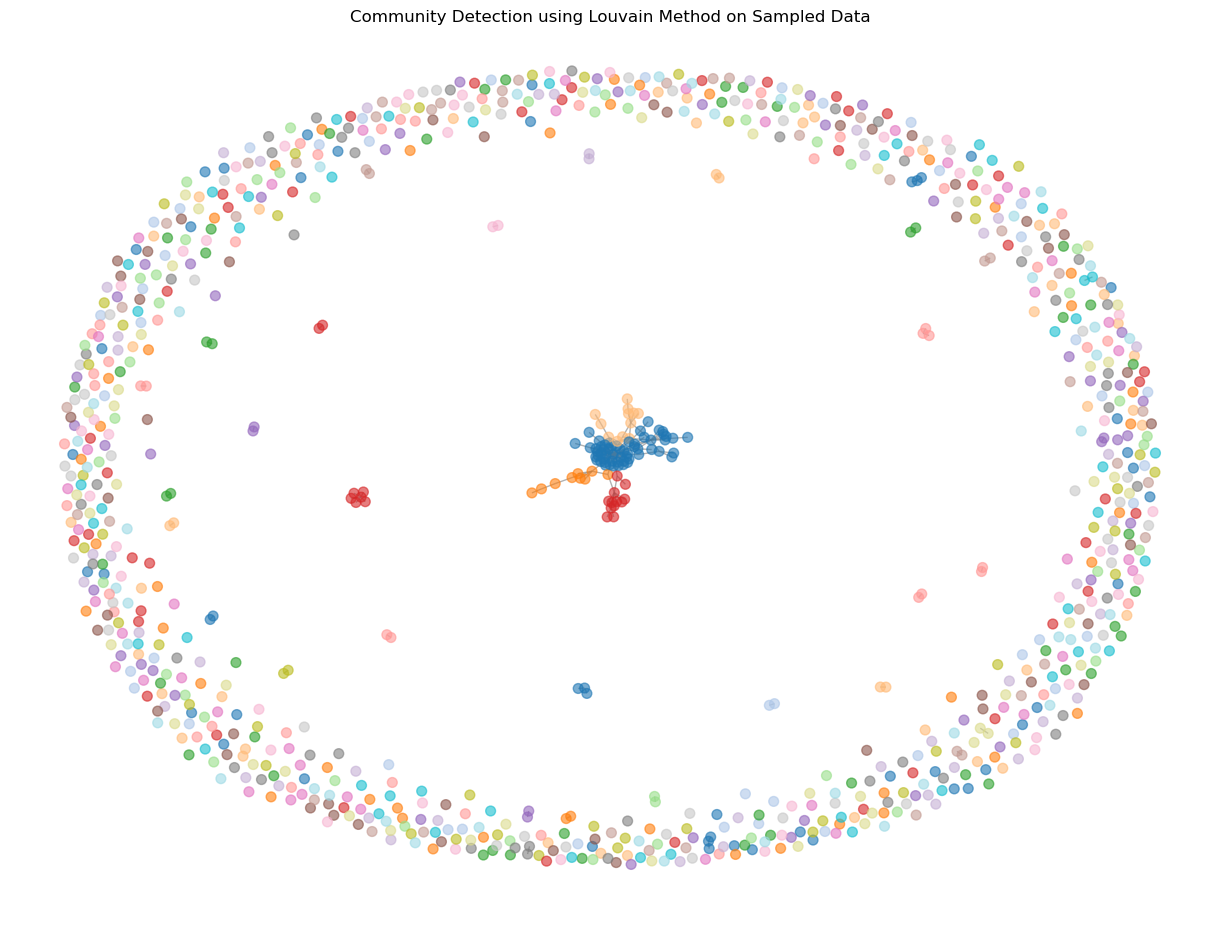

In [154]:
# Sample a subset of nodes to create a smaller graph
sample_size = 1000  # Sample size

# Ensure we have enough nodes to sample from
if len(G.nodes()) < sample_size:
    sample_size = len(G.nodes())

# Randomly sample nodes and create a subgraph
sampled_nodes = random.sample(list(G.nodes()), sample_size)
subgraph = G.subgraph(sampled_nodes)

# Convert the subgraph to undirected
subgraph_undirected = subgraph.to_undirected()

# Apply the Louvain method for community detection
partition = community_louvain.best_partition(subgraph_undirected)

# Assign colors based on community
node_colors = [partition[node] for node in subgraph_undirected.nodes()]

# Plot the graph with communities
plt.figure(figsize=(12, 9))
# Use the updated method to get the colormap
cmap = plt.colormaps['tab20']  # Updated colormap access method
nx.draw(subgraph_undirected, node_color=node_colors, cmap=cmap, node_size=50, edge_color='gray', alpha=0.6, with_labels=False)

plt.title("Community Detection using Louvain Method on Sampled Data")
plt.show()

# > Calculating Authority and Hub

In [128]:
# Calculate authority and hub scores using the HITS algorithm on the sample graph
hits_scores = nx.hits(sample_graph, max_iter=100, tol=1e-06)
authority_scores = hits_scores[1]
hub_scores = hits_scores[0]

# Display the top 10 nodes by authority and hub scores
def display_top_hits(scores, score_type, top_n=10):
    top_nodes = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    print(f"Top {top_n} nodes by {score_type} score:")
    for node, score in top_nodes:
        print(f"Node {node}: {score:.4f}")

# Display top nodes by authority score
display_top_hits(authority_scores, "Authority")

print("\n")

# Display top nodes by hub score
display_top_hits(hub_scores, "Hub")

Top 10 nodes by Authority score:
Node 76: 0.0129
Node 56: 0.0124
Node 136: 0.0114
Node 93: 0.0105
Node 155: 0.0101
Node 74: 0.0096
Node 78: 0.0095
Node 106: 0.0092
Node 83: 0.0090
Node 195: 0.0086


Top 10 nodes by Hub score:
Node 76: 0.0129
Node 56: 0.0124
Node 136: 0.0114
Node 93: 0.0105
Node 155: 0.0101
Node 74: 0.0096
Node 78: 0.0095
Node 106: 0.0092
Node 83: 0.0090
Node 195: 0.0086


In [80]:
# Calculate HITS scores for authority and hub values on the sample graph
hits_scores = nx.hits(sample_graph, max_iter=100, tol=1e-06)
authority_scores = hits_scores[1]
hub_scores = hits_scores[0]

# Scale authority and hub scores for visualization purposes
authority_values = np.array([authority_scores[node] for node in sample_graph.nodes()])
hub_values = np.array([hub_scores[node] for node in sample_graph.nodes()])

# Normalize values for visualization (adjust node sizes)
authority_sizes = 1000 * (authority_values / max(authority_values))  # Scale for authority
hub_sizes = 1000 * (hub_values / max(hub_values))                    # Scale for hub

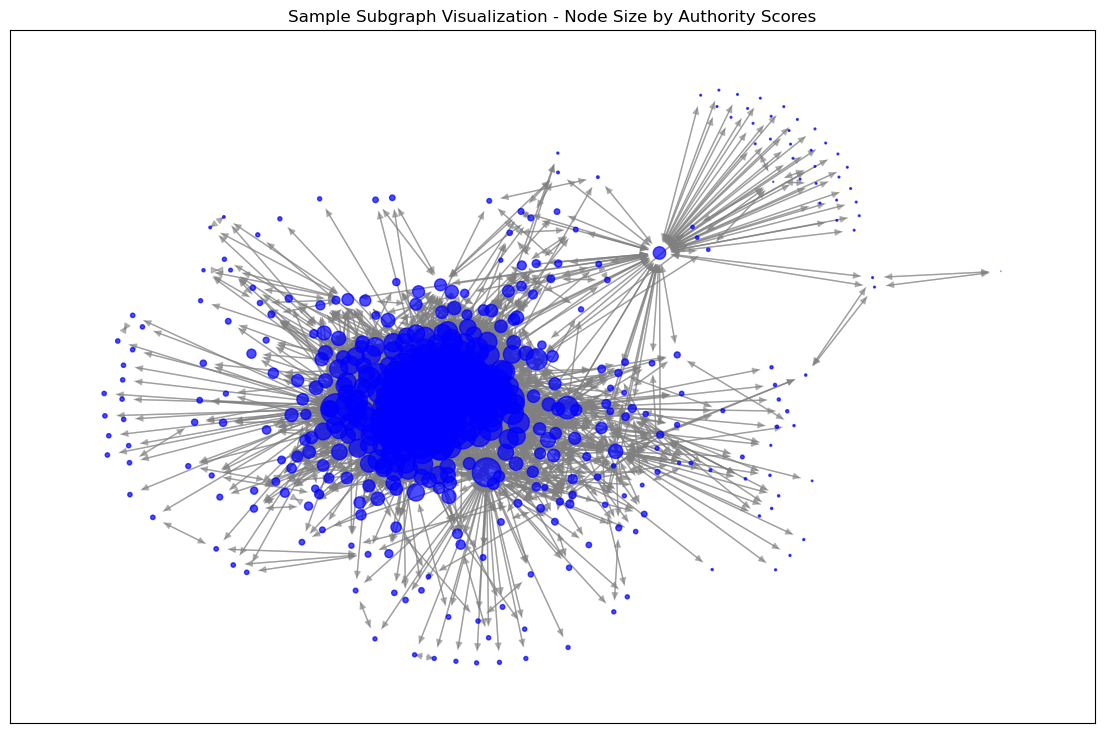

In [84]:
# Visualization of Authority Scores
plt.figure(figsize=(14, 9))
nx.draw_networkx_nodes(sample_graph, pos, node_size=authority_sizes, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(sample_graph, pos, edge_color="grey", alpha=0.5)
plt.title("Sample Subgraph Visualization - Node Size by Authority Scores")
plt.show()

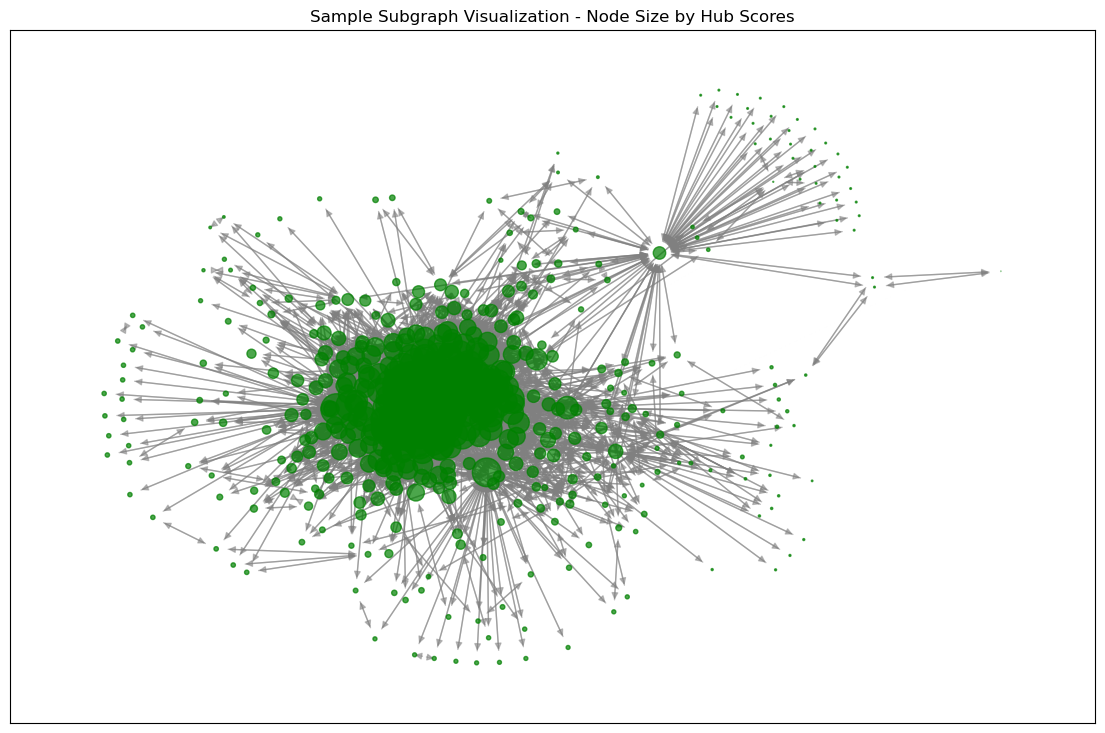

In [86]:
# Visualization of Hub Scores
plt.figure(figsize=(14, 9))
nx.draw_networkx_nodes(sample_graph, pos, node_size=hub_sizes, node_color='green', alpha=0.7)
nx.draw_networkx_edges(sample_graph, pos, edge_color="grey", alpha=0.5)
plt.title("Sample Subgraph Visualization - Node Size by Hub Scores")
plt.show()

# > Centrality Measures

## - In-degree and Out degree centrality

In [94]:
# Centrality Measures for the sample graph
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)

# Top 10 nodes by in-degree and out-degree centrality
top_10_in_degree = sorted(in_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_out_degree = sorted(out_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print top 10 nodes by in-degree centrality
print("Top 10 nodes by in-degree centrality:")
for node, score in top_10_in_degree:
    print(f"Node {node}: {score:.4f}")

print("\n")

# Print top 10 nodes by out-degree centrality
print("Top 10 nodes by out-degree centrality:")
for node, score in top_10_out_degree:
    print(f"Node {node}: {score:.4f}")

Top 10 nodes by in-degree centrality:
Node 5038: 0.0377
Node 273: 0.0373
Node 458: 0.0344
Node 140: 0.0339
Node 1028: 0.0339
Node 195: 0.0312
Node 370: 0.0300
Node 1139: 0.0291
Node 136: 0.0280
Node 566: 0.0252


Top 10 nodes by out-degree centrality:
Node 5038: 0.0377
Node 273: 0.0373
Node 458: 0.0344
Node 140: 0.0339
Node 1028: 0.0339
Node 195: 0.0312
Node 370: 0.0300
Node 1139: 0.0291
Node 136: 0.0280
Node 566: 0.0252


In [96]:
# Take a sample of nodes to visualize (for performance reasons)
sample_nodes = list(G.nodes())[:500]  # Use the original graph for sampling
sample_graph = G.subgraph(sample_nodes)

# Extract in-degree and out-degree values for nodes in the sample graph
in_degree_values = np.array([in_degree_centrality[node] for node in sample_graph.nodes()])
out_degree_values = np.array([out_degree_centrality[node] for node in sample_graph.nodes()])

# Normalize values for visualization (adjust node sizes)
in_degree_sizes = 1000 * (in_degree_values / max(in_degree_values)) if max(in_degree_values) > 0 else in_degree_values
out_degree_sizes = 1000 * (out_degree_values / max(out_degree_values)) if max(out_degree_values) > 0 else out_degree_values

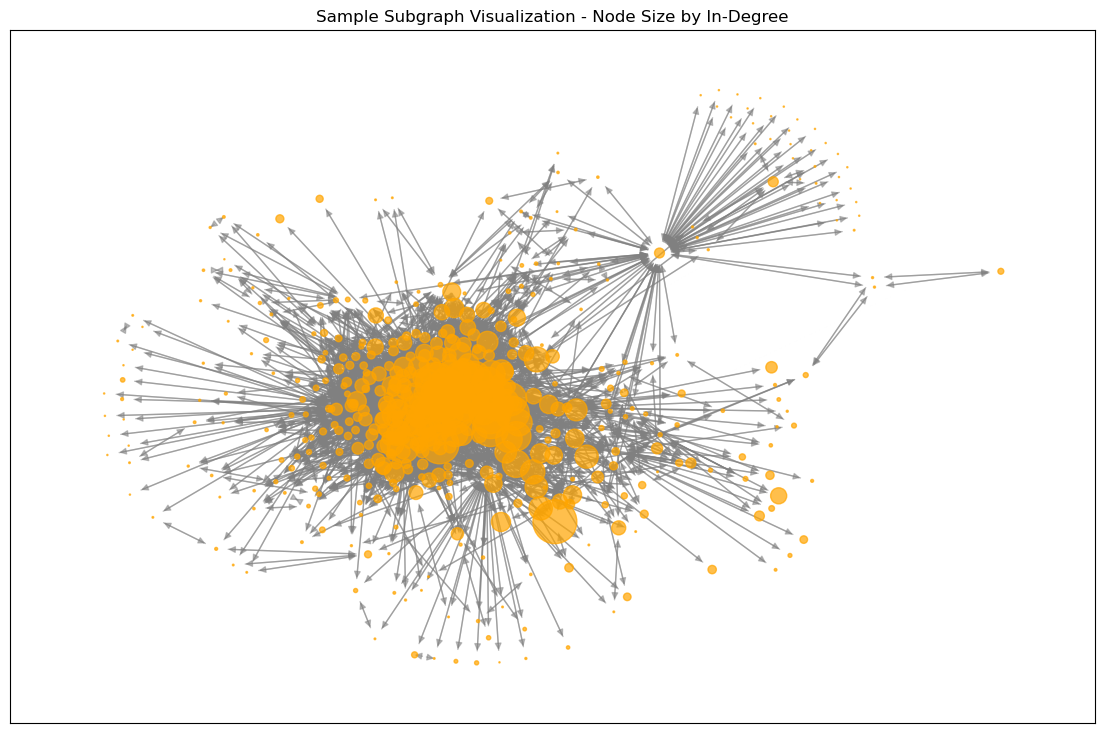

In [100]:
# Visualization of In-Degree
plt.figure(figsize=(14, 9))
nx.draw_networkx_nodes(sample_graph, pos, node_size=in_degree_sizes, node_color='orange', alpha=0.7)
nx.draw_networkx_edges(sample_graph, pos, edge_color="grey", alpha=0.5)
plt.title("Sample Subgraph Visualization - Node Size by In-Degree")
plt.show()

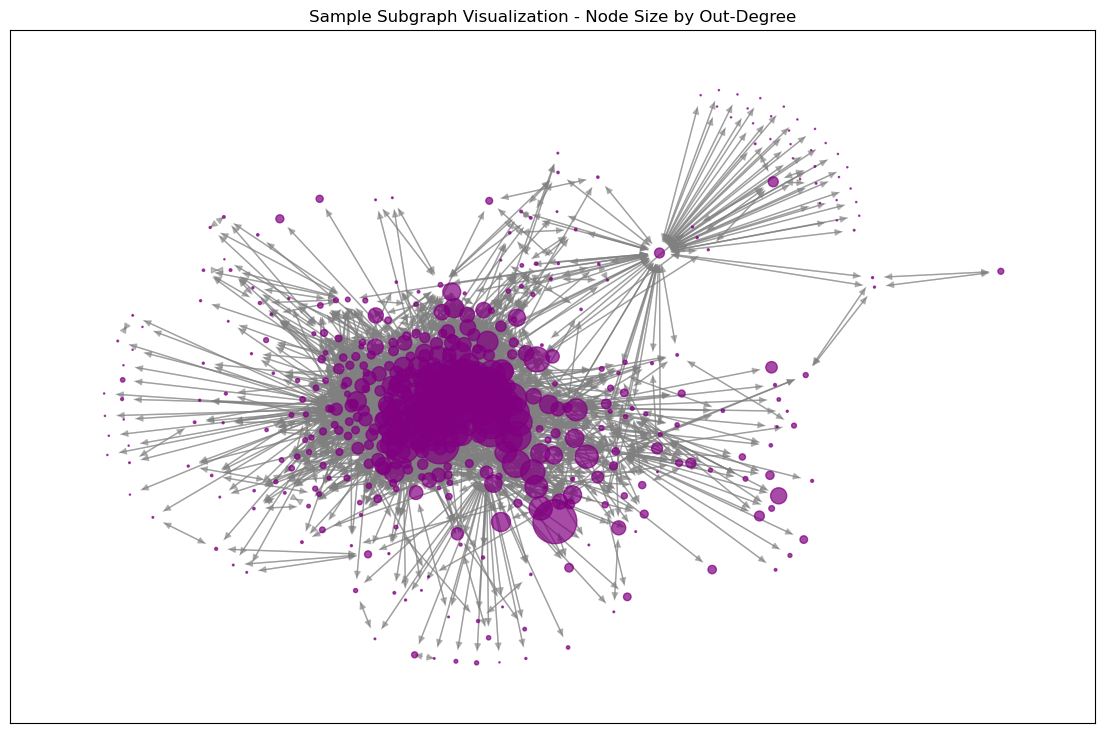

In [102]:
# Visualization of Out-Degree
plt.figure(figsize=(14, 9))
nx.draw_networkx_nodes(sample_graph, pos, node_size=out_degree_sizes, node_color='purple', alpha=0.7)
nx.draw_networkx_edges(sample_graph, pos, edge_color="grey", alpha=0.5)
plt.title("Sample Subgraph Visualization - Node Size by Out-Degree")
plt.show()

## - Betweenness Centrality

In [106]:
# Betweenness Centrality for the entire graph
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Top 10 nodes by betweenness centrality
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 nodes by betweenness centrality:")
for node, score in top_10_betweenness:
    print(f"Node {node}: {score:.4f}")

Top 10 nodes by betweenness centrality:
Node 5038: 0.0649
Node 140: 0.0604
Node 566: 0.0363
Node 588: 0.0355
Node 1139: 0.0354
Node 273: 0.0350
Node 458: 0.0345
Node 46: 0.0306
Node 1028: 0.0283
Node 292: 0.0255


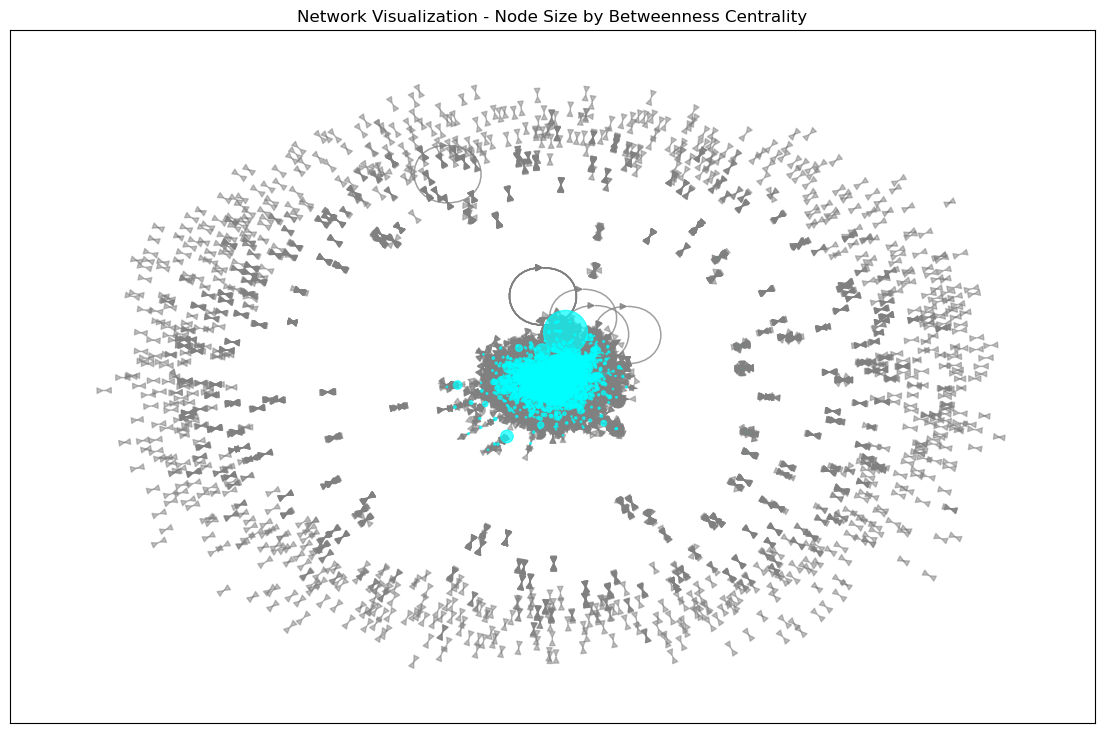

In [114]:
# Normalize values for visualization
betweenness_values = np.array(list(betweenness_centrality.values()))
betweenness_sizes = 1000 * (betweenness_values / max(betweenness_values)) if max(betweenness_values) > 0 else betweenness_values

# Define positions for consistent layout across graphs
pos = nx.spring_layout(G)

# Visualization of Betweenness Centrality
plt.figure(figsize=(14, 9))
nx.draw_networkx_nodes(G, pos, node_size=betweenness_sizes, node_color='cyan', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color="grey", alpha=0.5)
plt.title("Network Visualization - Node Size by Betweenness Centrality")
plt.show()

## - Closeness Centrality

In [116]:
from igraph import Graph

# Convert the NetworkX graph to an igraph graph
edges = list(G.edges())
igraph_graph = Graph(edges=edges)

# Calculate closeness centrality using igraph
closeness_centrality = igraph_graph.closeness()

# Get the top 10 nodes by closeness centrality
top_10_closeness = sorted(enumerate(closeness_centrality), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by closeness centrality (using igraph):")
for node, score in top_10_closeness:
    print(f"Node {node}: {score:.4f}")

Top 10 nodes by closeness centrality (using igraph):
Node 2086: 1.0000
Node 2087: 1.0000
Node 4631: 1.0000
Node 5012: 1.0000
Node 5013: 1.0000
Node 5014: 1.0000
Node 8563: 1.0000
Node 9160: 1.0000
Node 9505: 1.0000
Node 9506: 1.0000


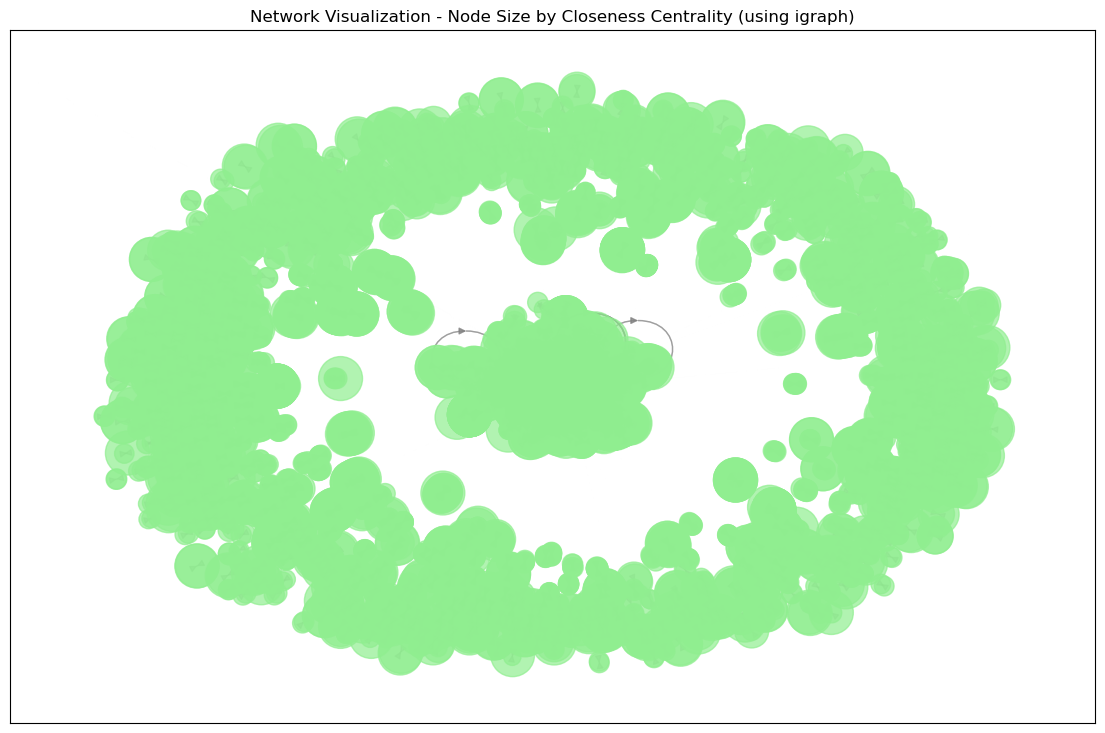

In [118]:
# Normalize values for visualization (adjust node sizes)
closeness_values = np.array(closeness_centrality)
closeness_sizes = 1000 * (closeness_values / max(closeness_values)) if max(closeness_values) > 0 else closeness_values

# Define positions for consistent layout across graphs using NetworkX for drawing
pos = nx.spring_layout(G)

# Visualization of Closeness Centrality using NetworkX
plt.figure(figsize=(14, 9))
nx.draw_networkx_nodes(G, pos, node_size=closeness_sizes, node_color='lightgreen', alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color="grey", alpha=0.5)
plt.title("Network Visualization - Node Size by Closeness Centrality (using igraph)")
plt.show()

## - Eigenvector Centrality

In [178]:
# Calculate Eigenvector Centrality for each node
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print the top 10 nodes by Eigenvector Centrality
top_10_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by Eigenvector Centrality:")
for node, score in top_10_eigenvector:
    print(f"Node {node}: {score:.4f}")

Top 10 nodes by Eigenvector Centrality:
Node 136: 0.1496
Node 195: 0.1271
Node 76: 0.1265
Node 370: 0.1213
Node 1028: 0.1124
Node 273: 0.1121
Node 734: 0.1044
Node 416: 0.1005
Node 175: 0.0989
Node 292: 0.0975


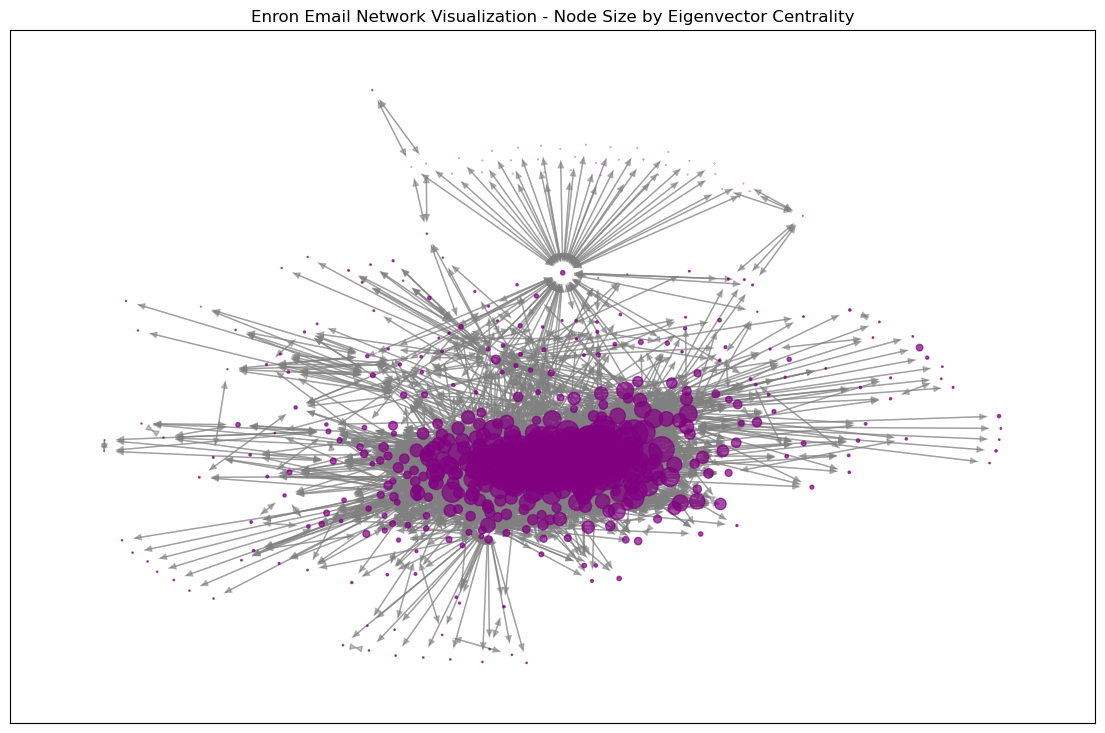

In [182]:
# Take a sample of nodes to visualize (for performance reasons)
sample_nodes = list(G.nodes())[:500]
sample_graph = G.subgraph(sample_nodes)

# Extract Eigenvector Centrality scores for nodes in the sample
eigenvector_values = np.array([eigenvector_centrality[node] for node in sample_graph.nodes()])

# Normalize values for visualization (adjust node sizes)
eigenvector_sizes = 1000 * (eigenvector_values / max(eigenvector_values)) if max(eigenvector_values) > 0 else eigenvector_values

# Define positions for consistent layout
pos = nx.spring_layout(sample_graph)

# Visualize the graph with Eigenvector Centrality-based node sizes
plt.figure(figsize=(14, 9))
nx.draw_networkx_nodes(sample_graph, pos, node_size=eigenvector_sizes, node_color='purple', alpha=0.7)
nx.draw_networkx_edges(sample_graph, pos, edge_color="grey", alpha=0.5)
plt.title("Enron Email Network Visualization - Node Size by Eigenvector Centrality")
plt.show()

# > Link Prediction

## - Jaccard Coefficient

In [158]:
import random
import networkx as nx

# Sample a subset of nodes to create a smaller undirected graph
sample_size = 1000  # Sample size

# Ensure we have enough nodes to sample from
if len(G.nodes()) < sample_size:
    sample_size = len(G.nodes())

# Randomly sample nodes and create a subgraph
sampled_nodes = random.sample(list(G.nodes()), sample_size)
subgraph = G.subgraph(sampled_nodes).to_undirected()

# Compute the Jaccard Coefficient for each pair of nodes in the subgraph
jaccard = list(nx.jaccard_coefficient(subgraph))

# Sort and extract the top 10 predicted links based on the Jaccard coefficient
top_jaccard = sorted(jaccard, key=lambda x: x[2], reverse=True)[:10]

# Print the top 10 predicted links (Jaccard Coefficient)
print("Top 10 predicted links (Jaccard Coefficient) in the subgraph:")
for u, v, p in top_jaccard:
    print(f"Predicted link: ({u}, {v}) with Jaccard Coefficient: {p:.4f}")

Top 10 predicted links (Jaccard Coefficient) in the subgraph:
Predicted link: (26725, 3281) with Jaccard Coefficient: 1.0000
Predicted link: (26870, 26571) with Jaccard Coefficient: 1.0000
Predicted link: (26870, 26585) with Jaccard Coefficient: 1.0000
Predicted link: (2302, 2332) with Jaccard Coefficient: 1.0000
Predicted link: (2302, 2341) with Jaccard Coefficient: 1.0000
Predicted link: (2302, 2434) with Jaccard Coefficient: 1.0000
Predicted link: (2332, 2341) with Jaccard Coefficient: 1.0000
Predicted link: (2332, 2434) with Jaccard Coefficient: 1.0000
Predicted link: (2341, 2434) with Jaccard Coefficient: 1.0000
Predicted link: (6452, 5105) with Jaccard Coefficient: 1.0000


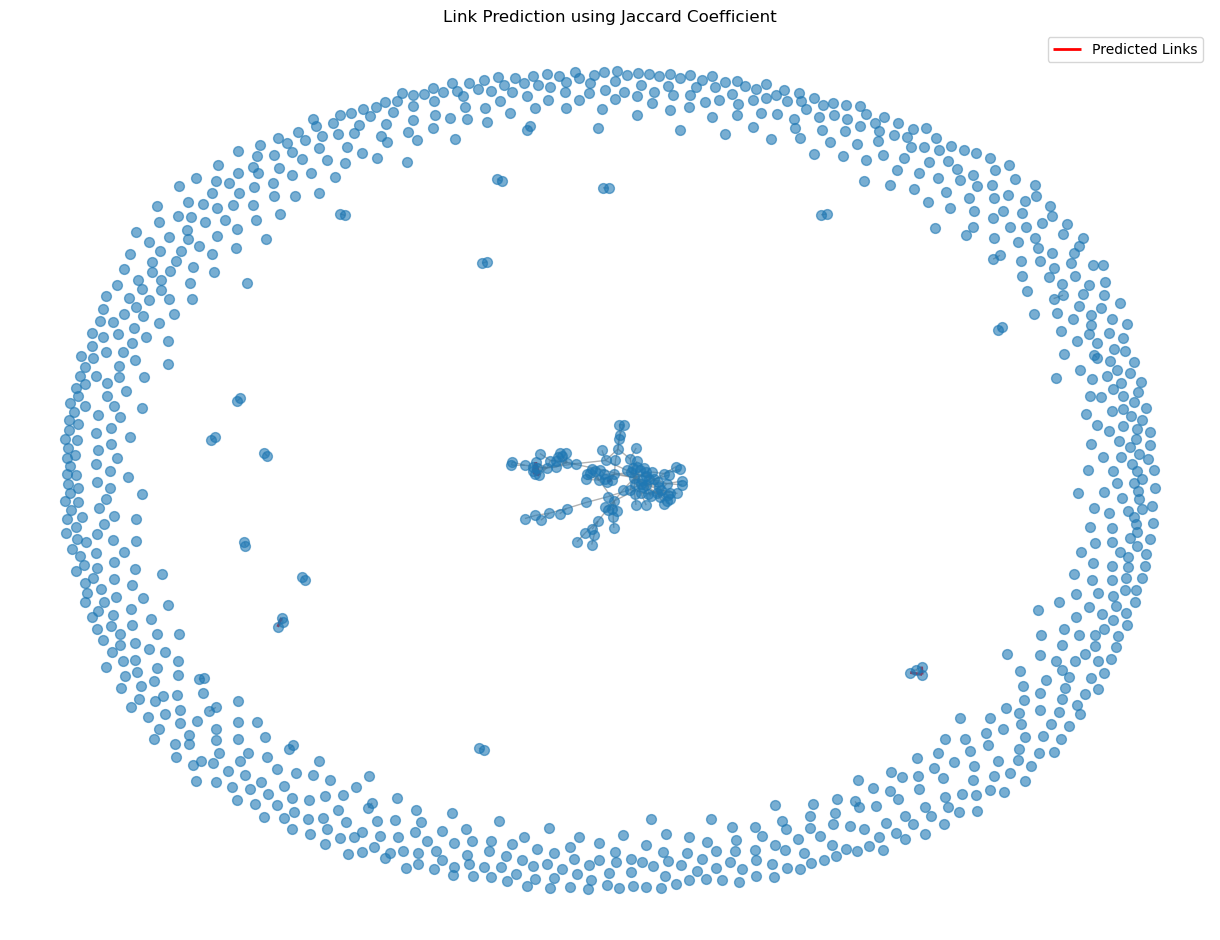

In [160]:
# If you want to visualize the subgraph with predicted links, you can uncomment the code below

# # Extract the predicted links for visualization
predicted_links = [(u, v) for u, v, p in top_jaccard]
pos = nx.spring_layout(subgraph)

plt.figure(figsize=(12, 9))
nx.draw(subgraph, pos, node_size=50, edge_color='gray', alpha=0.6, with_labels=False)
nx.draw_networkx_edges(subgraph, pos, edgelist=predicted_links, edge_color='red', width=2, label='Predicted Links')
plt.title("Link Prediction using Jaccard Coefficient")
plt.legend()
plt.show()

## - Assortativity Coefficient

In [162]:
import networkx as nx

# Assuming G is the graph created from your Enron email dataset

# Calculate the Degree Assortativity Coefficient for the entire dataset
degree_assortativity = nx.degree_assortativity_coefficient(G)

# Print the Degree Assortativity Coefficient
print("Degree Assortativity Coefficient:", degree_assortativity)

# Explanation of the Degree Assortativity Coefficient
# The Degree Assortativity Coefficient measures the tendency of nodes in a network to connect with other nodes that have a similar degree (number of connections).
# A positive value indicates a tendency for nodes of similar degree to connect (assortative mixing),
# while a negative value indicates a tendency for nodes of dissimilar degree to connect (disassortative mixing).
# This means that in the Enron email network, nodes with a high degree (many connections) are somewhat more likely to connect with nodes that have a low degree (few connections).

Degree Assortativity Coefficient: -0.11076403259610496


## - Clustering Coefficient

In [164]:
import networkx as nx

# Assuming G is the graph created from your Enron email dataset

# Calculate clustering coefficient for each node
clustering_coefficients = nx.clustering(G)

# Print the Clustering Coefficient per Node
print("Clustering Coefficient per Node:")
for node, coeff in clustering_coefficients.items():
    print(f"Node {node}: {coeff}")

# Calculate the average clustering coefficient for the entire graph
average_clustering_coefficient = nx.average_clustering(G)
print(f"\nAverage Clustering Coefficient for the Graph: {average_clustering_coefficient}")

# Optionally, identify nodes with high clustering coefficients
# These nodes may have a higher tendency to form connections (links) with each other
high_clustering_nodes = [node for node, coeff in clustering_coefficients.items() if coeff > 0.5]  # Adjust threshold as needed
print(f"\nNodes with High Clustering Coefficients (> 0.5): {high_clustering_nodes}")

Clustering Coefficient per Node:
Node 0: 0
Node 1: 0.013664596273291925
Node 2: 0
Node 3: 0.6
Node 4: 0.5357142857142857
Node 5: 0.1115811739820201
Node 6: 0.5
Node 7: 0.4945054945054945
Node 8: 0
Node 9: 0.03643724696356275
Node 10: 1.0
Node 11: 0.8
Node 12: 0.8
Node 13: 0.2857142857142857
Node 14: 0
Node 15: 0.3333333333333333
Node 16: 0.3
Node 17: 0
Node 18: 0.1
Node 19: 0
Node 20: 0
Node 21: 0.5
Node 22: 0
Node 23: 0
Node 24: 0
Node 25: 0
Node 26: 0
Node 27: 0.15551115551115552
Node 28: 0
Node 29: 0
Node 30: 0
Node 31: 0
Node 32: 0
Node 33: 0
Node 34: 0
Node 35: 0
Node 36: 0
Node 37: 0
Node 38: 0
Node 39: 0.0457516339869281
Node 40: 0
Node 41: 0
Node 42: 0.16666666666666666
Node 43: 0
Node 44: 0.044444444444444446
Node 45: 0.14666666666666667
Node 46: 0.07271557271557272
Node 47: 0
Node 48: 0
Node 49: 0.6444444444444445
Node 50: 0.5818181818181818
Node 51: 0
Node 52: 0
Node 53: 0.12317772317772317
Node 54: 0.1374490390215492
Node 55: 0.26666666666666666
Node 56: 0.06153070230740133

# > PageRank

In [170]:
# Calculate PageRank for each node
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Display the top 10 nodes by PageRank score
top_10_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by PageRank score:")
for node, score in top_10_pagerank:
    print(f"Node {node}: {score:.4f}")

Top 10 nodes by PageRank score:
Node 5038: 0.0114
Node 273: 0.0032
Node 140: 0.0030
Node 458: 0.0030
Node 588: 0.0029
Node 566: 0.0029
Node 1028: 0.0028
Node 1139: 0.0025
Node 370: 0.0023
Node 893: 0.0022


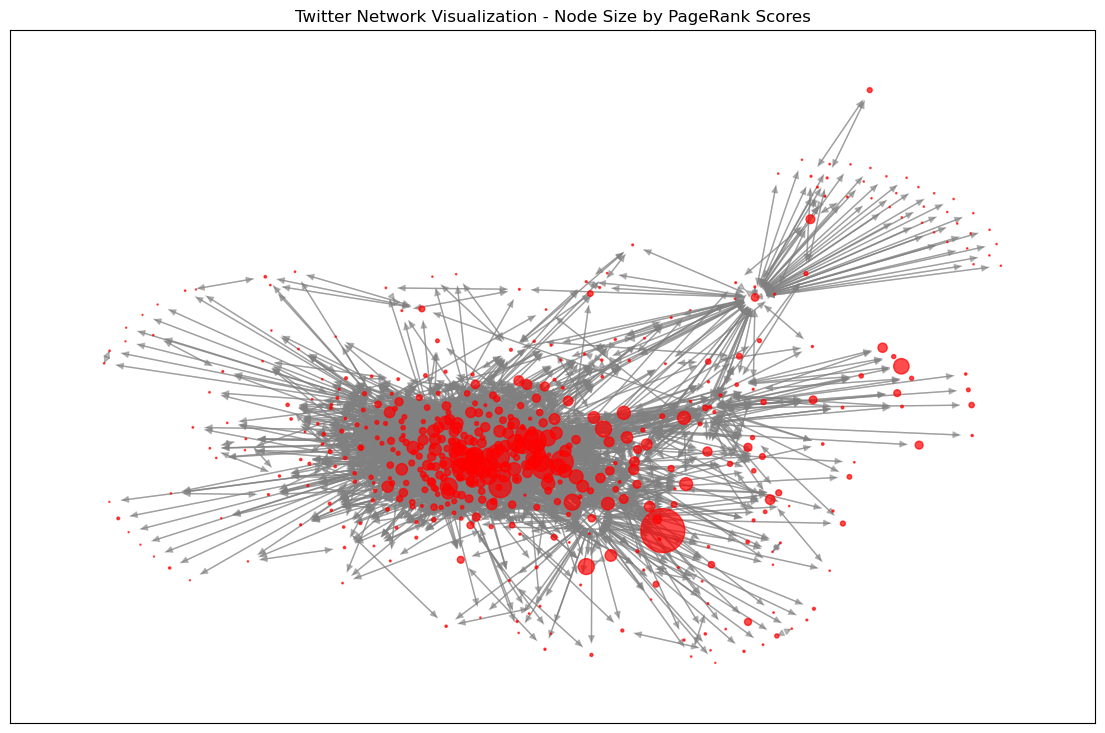

In [176]:
# Take a sample of nodes to visualize (for performance reasons)
sample_size = 500  # Adjust sample size based on your requirements
sample_nodes = list(G.nodes())[:sample_size]
sample_graph = G.subgraph(sample_nodes)

# Extract PageRank scores for nodes in the sample
pagerank_values = np.array([pagerank_scores[node] for node in sample_graph.nodes()])

# Normalize values for visualization (adjust node sizes)
pagerank_sizes = 1000 * (pagerank_values / max(pagerank_values))

# Define positions for consistent layout
pos = nx.spring_layout(sample_graph)

# Visualize the graph with PageRank-based node sizes
plt.figure(figsize=(14, 9))
nx.draw_networkx_nodes(sample_graph, pos, node_size=pagerank_sizes, node_color='red', alpha=0.7)
nx.draw_networkx_edges(sample_graph, pos, edge_color="grey", alpha=0.5)
plt.title("Twitter Network Visualization - Node Size by PageRank Scores")
plt.show()

# > K-Core, K-Club, K-Clan

In [34]:
# Function to compute k-core, approximate k-club, and approximate k-clan
def compute_k_structures(graph, k, max_subgraph_size=1000):
    # k-core calculation
    k_core = nx.k_core(graph, k)
    print(f"\n--- k-Core (k={k}) ---")
    print(f"Number of nodes in k-core: {len(k_core.nodes)}")
    print(f"Number of edges in k-core: {len(k_core.edges)}\n")

    # Approximate k-clubs using ego networks
    print(f"--- Approximate k-Clubs (k={k}) ---")
    ego_k_clubs = []
    for node in list(graph.nodes)[:10]:  # Limiting to first 10 nodes for demonstration
        ego_net = nx.ego_graph(graph, node, radius=k)
        if len(ego_net) <= max_subgraph_size and nx.is_connected(ego_net):
            ego_k_clubs.append(ego_net)
            print(f"  Ego network for node {node}: {len(ego_net.nodes)} nodes, {len(ego_net.edges)} edges")

    if not ego_k_clubs:
        print("No suitable k-club approximations found.\n")
    print("\n")
    # Sample the graph for k-clan detection (e.g., 1000 random nodes or edges)
    sample_nodes = random.sample(list(graph.nodes), 1000)  # Convert to list for sampling

    # Create a subgraph from the sampled nodes
    sample_graph = graph.subgraph(sample_nodes)

    # Approximate k-clans on the sampled graph
    print(f"--- Approximate k-Clans (k={k}) on Sample ---")
    communities = list(greedy_modularity_communities(sample_graph))
    for i, community in enumerate(communities[:3]):  # Display first 3 communities for brevity
        community_subgraph = sample_graph.subgraph(community)
        if nx.is_connected(community_subgraph) and len(community_subgraph) <= max_subgraph_size:
            print(f"  Community {i+1}: {len(community_subgraph.nodes)} nodes, {len(community_subgraph.edges)} edges")
    
    if not communities:
        print("No suitable k-clan approximations found.")

# Set the k value and run the computations
k_value = 3
compute_k_structures(G, k_value)


--- k-Core (k=3) ---
Number of nodes in k-core: 21309
Number of edges in k-core: 166039

--- Approximate k-Clubs (k=3) ---
  Ego network for node 0: 632 nodes, 6857 edges
  Ego network for node 2: 632 nodes, 6857 edges
  Ego network for node 8: 632 nodes, 6857 edges


--- Approximate k-Clans (k=3) on Sample ---
  Community 1: 15 nodes, 16 edges
  Community 2: 10 nodes, 9 edges
  Community 3: 10 nodes, 9 edges


#  > Information Diffusion Models

## - Independent Cascade Model (ICM)

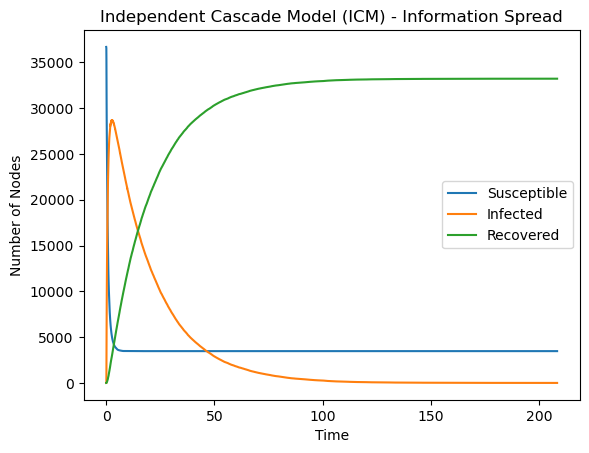

In [184]:
import numpy as np
import EoN

# Choose a small fraction of nodes to be initially infected
initial_infected = [0, 1, 5]  # Example of initial spreaders

# Set up infection and recovery rates
tau = 0.8  # Transmission probability (infection rate)
gamma = 0.05  # Recovery rate

# Simulate the spread using Independent Cascade Model
t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=initial_infected)


# Plot the results
import matplotlib.pyplot as plt

plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Independent Cascade Model (ICM) - Information Spread')
plt.legend()
plt.show()

In [188]:
print("Neighbors of initial infected nodes:")
for node in initial_infected:
    print(f"Node {node}: {list(G.neighbors(node))}")

Neighbors of initial infected nodes:
Node 18721: [753, 5149, 6805, 9504, 10937, 18713, 18719, 18720, 22758, 24609]
Node 4740: [72, 213, 292, 314, 416, 523, 566, 575, 586, 592, 613, 794, 1176, 1185, 1198, 1428, 1430, 1464, 1490, 2045, 2276, 2577, 2642, 2654, 3171, 3197, 3318, 4488, 4489, 4531, 4681, 5104, 5223, 5302, 5800, 7640, 7674, 7682, 7764, 12836, 15678, 21530, 26900]
Node 14921: [543, 560, 751, 760]


In [190]:
print("Final Susceptible:", S[-1])
print("Final Infected:", I[-1])
print("Final Recovered:", R[-1])

Final Susceptible: 996
Final Infected: 0
Final Recovered: 4


### - Using degree centrality of nodes

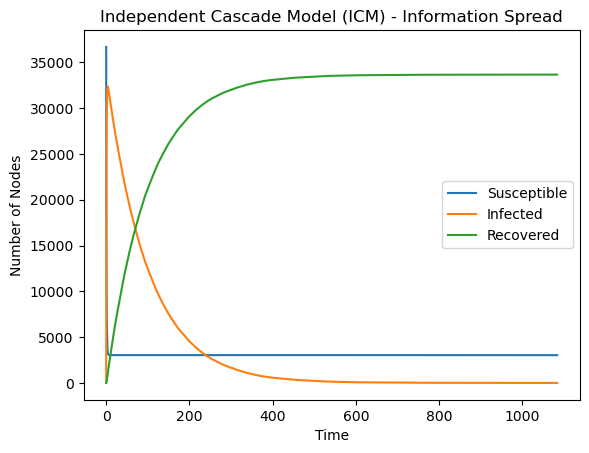

In [194]:
import numpy as np
import EoN
import networkx as nx
import matplotlib.pyplot as plt

# Calculate the degree centrality of nodes and choose the top 10 as initial spreaders
degree_centrality = nx.degree_centrality(G)
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
initial_infected = sorted_nodes[:10]  # Select top 10 most connected nodes

# Increase infection rate and decrease recovery rate to encourage spread
tau = 1.0  # Higher transmission probability
gamma = 0.01  # Lower recovery rate

# Simulate the spread using SIR model
t, S, I, R = EoN.fast_SIR(G, tau, gamma, initial_infecteds=initial_infected)

# Plot the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Independent Cascade Model (ICM) - Information Spread')
plt.legend()
plt.show()

In [196]:
# Final counts for susceptible, infected, and recovered at the last time step
final_susceptible = S[-1]
final_infected = I[-1]
final_recovered = R[-1]

print(f"Final Susceptible: {final_susceptible}")
print(f"Final Infected: {final_infected}")
print(f"Final Recovered: {final_recovered}")

Final Susceptible: 3032
Final Infected: 0
Final Recovered: 33660


### - Using some initial infected nodes

Using largest connected component with 33696 nodes.


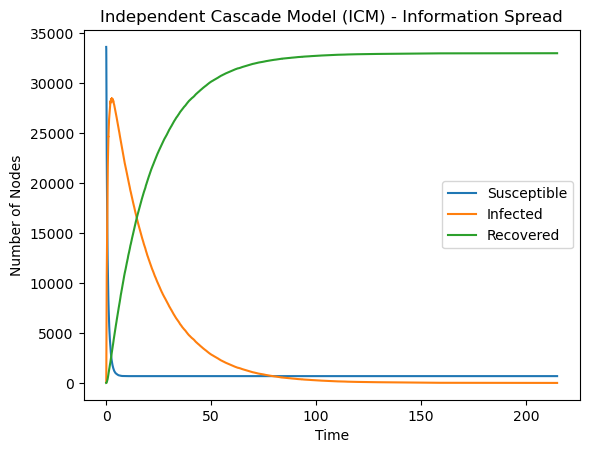

In [198]:
import EoN
import networkx as nx
import random
import matplotlib.pyplot as plt

# Convert the directed graph to an undirected one for compatibility
G_undirected = G.to_undirected()

# If the graph is not connected, use the largest connected component
if not nx.is_connected(G_undirected):
    largest_cc = max(nx.connected_components(G_undirected), key=len)
    G_undirected = G_undirected.subgraph(largest_cc).copy()
    print("Using largest connected component with", G_undirected.number_of_nodes(), "nodes.")

# Choose some initial infected nodes
initial_infected = random.sample(list(G_undirected.nodes), 50)

# Set infection and recovery rates
tau = 0.8   # Infection probability
gamma = 0.05  # Recovery rate

# Run the SIR model on the undirected graph
t, S, I, R = EoN.fast_SIR(G_undirected, tau, gamma, initial_infecteds=initial_infected)

# Plot the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Nodes')
plt.title('Independent Cascade Model (ICM) - Information Spread')
plt.legend()
plt.show()

In [200]:
# Print final numbers for each state
print(f"Final Susceptible: {S[-1]}")
print(f"Final Infected: {I[-1]}")
print(f"Final Recovered: {R[-1]}")

Final Susceptible: 681
Final Infected: 0
Final Recovered: 33015


## - Linear Threshold Model (LTM)

In [220]:
# Set node thresholds for activation
thresholds = {node: random.uniform(0.1, 0.9) for node in G.nodes()}

# Function to simulate the Linear Threshold Model
def linear_threshold(G, initial_active, thresholds, max_steps=10):
    active_nodes = set(initial_active)
    history = [active_nodes.copy()]

    for step in range(max_steps):
        next_active = set()
        for node in G.nodes():
            if node not in active_nodes:
                active_neighbors = [n for n in G.neighbors(node) if n in active_nodes]
                total_weight = sum(G[node][n].get('weight', 1) for n in active_neighbors)
                if total_weight >= thresholds[node]:
                    next_active.add(node)
        active_nodes.update(next_active)
        history.append(active_nodes.copy())
        if not next_active:
            break

    return history

# Select random initial active nodes
initial_active = random.sample(list(G.nodes()), 5)

# Simulate the spread using the Linear Threshold Model
LT_model_result = linear_threshold(G, initial_active, thresholds)

# Prepare data for plotting
active_counts = [len(active) for active in LT_model_result]

# Print the final results
print("Initial Active Nodes:", initial_active)
print("Active Nodes Over Time:")
for time_step, count in enumerate(active_counts):
    print(f"Time Step {time_step}: {count} active nodes")

Initial Active Nodes: [24641, 16071, 14600, 33054, 35312]
Active Nodes Over Time:
Time Step 0: 5 active nodes
Time Step 1: 30 active nodes
Time Step 2: 770 active nodes
Time Step 3: 16863 active nodes
Time Step 4: 30676 active nodes
Time Step 5: 33333 active nodes
Time Step 6: 33669 active nodes
Time Step 7: 33694 active nodes
Time Step 8: 33696 active nodes
Time Step 9: 33696 active nodes


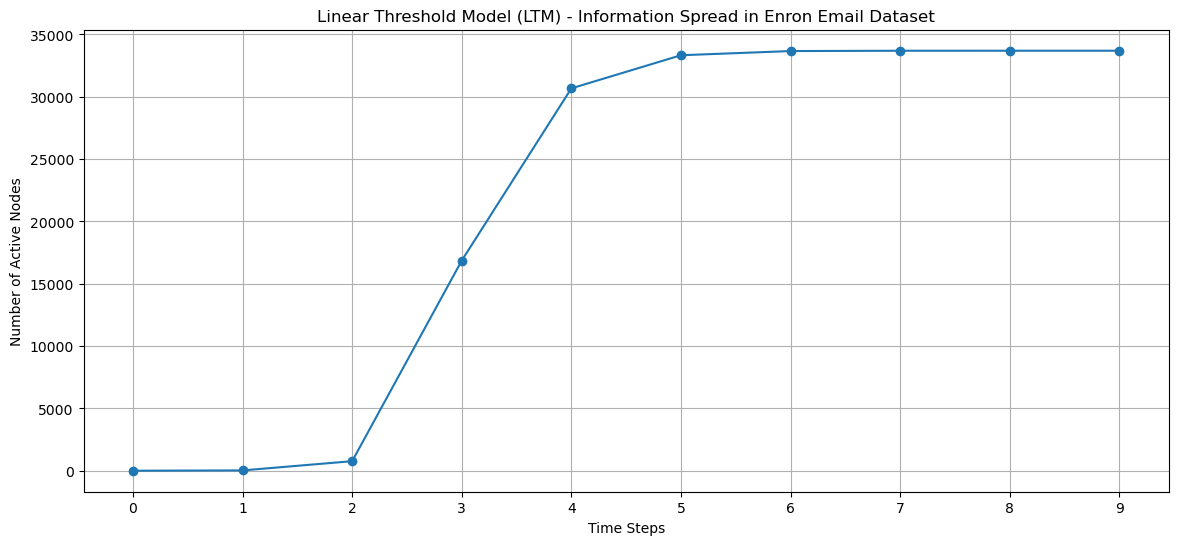

In [224]:
# Plot the diffusion process
plt.figure(figsize=(14, 6))
plt.plot(active_counts, marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Number of Active Nodes')
plt.title('Linear Threshold Model (LTM) - Information Spread in Enron Email Dataset')
plt.grid()
plt.xticks(range(len(active_counts)))
plt.show()

# > Model Evaluation

In [228]:
# Calculate observed cascade (nodes that sent or received at least one email)
observed_cascade = set(G.nodes)  # All nodes in the graph are considered active

# Set node thresholds for activation
thresholds = {node: random.uniform(0.1, 0.9) for node in G.nodes()}

# Function to simulate the Linear Threshold Model
def linear_threshold(G, initial_active, thresholds, max_steps=10):
    active_nodes = set(initial_active)
    history = [active_nodes.copy()]

    for step in range(max_steps):
        next_active = set()
        
        for node in G.nodes():
            if node not in active_nodes:
                active_neighbors = [n for n in G.neighbors(node) if n in active_nodes]
                total_weight = sum(G[node][n].get('weight', 1) for n in active_neighbors)
                if total_weight >= thresholds[node]:
                    next_active.add(node)

        active_nodes.update(next_active)
        history.append(active_nodes.copy())

        if not next_active:
            break

    return history

# Select initial active nodes (e.g., random selection from the observed cascade)
initial_active = random.sample(list(observed_cascade), 50)  # Randomly select 50 nodes as initial active

# Simulate the spread using Linear Threshold Model
LT_model_result = linear_threshold(G, initial_active, thresholds)

# Prepare data for evaluation
simulated_cascade = set()
for step in LT_model_result:
    simulated_cascade.update(step)

# Calculate evaluation metrics
def calculate_metrics(observed, simulated):
    true_positive = len(observed & simulated)
    false_positive = len(simulated - observed)
    false_negative = len(observed - simulated)

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

precision, recall, f1_score = calculate_metrics(observed_cascade, simulated_cascade)

# Print the evaluation results
print(f"Observed Cascade (Active Nodes): {len(observed_cascade)}")
print(f"Simulated Cascade (Active Nodes): {len(simulated_cascade)}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Observed Cascade (Active Nodes): 36692
Simulated Cascade (Active Nodes): 33729
Precision: 1.0000
Recall: 0.9192
F1 Score: 0.9579


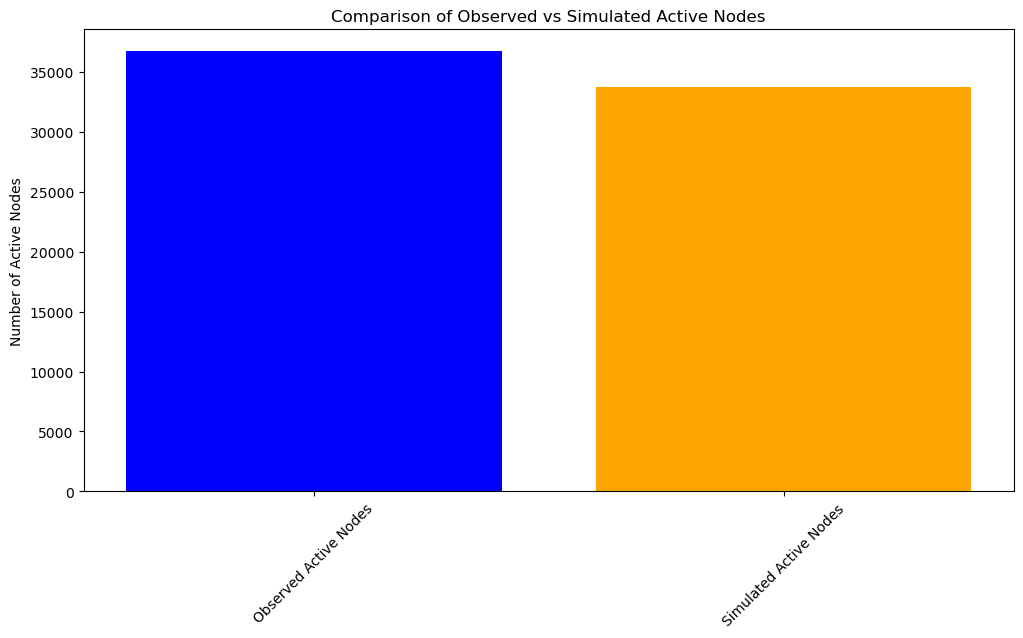

In [232]:
# Optional: Plot the results for visualization
plt.figure(figsize=(12, 6))
plt.bar(['Observed Active Nodes', 'Simulated Active Nodes'], [len(observed_cascade), len(simulated_cascade)], color=['blue', 'orange'])
plt.ylabel('Number of Active Nodes')
plt.title('Comparison of Observed vs Simulated Active Nodes')
plt.xticks(rotation=45)
plt.show()

# **Thankyou !!**